In [7]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [8]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [9]:
#pixels = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_tp.fits")
#pixels.interact()
#lc.query_solar_system_objects()

In [41]:
lc = lk.search.open("TIC 360872390/tess2019169103026-s0013-0000000360872390-0146-s_lc.fits").PDCSAP_FLUX
#lc2 = open("TIC 50492743/tess2020212050318-s0028-0000000050492743-0190-s_lc.fits").PDCSAP_FLUX
#lc = lc1.append(lc2)
flatten_win_length = int(0.05 * len(lc.flux))
print("win_length", flatten_win_length)
lc = lc.remove_outliers(sigma=6).normalize().remove_nans()#.flatten(flatten_win_length)

win_length 979


TIC 360872390 : Folding on period  7.130000000000006


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

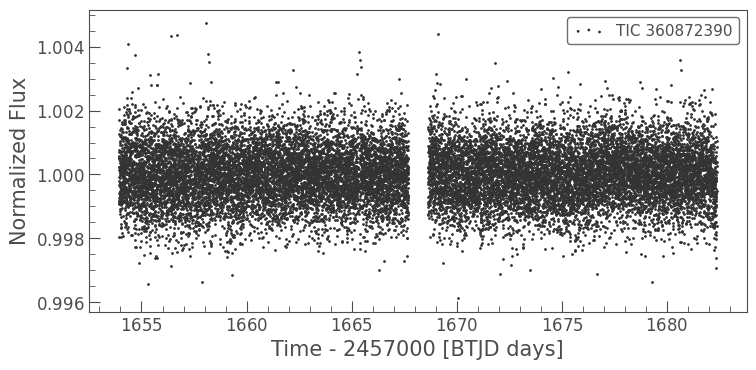

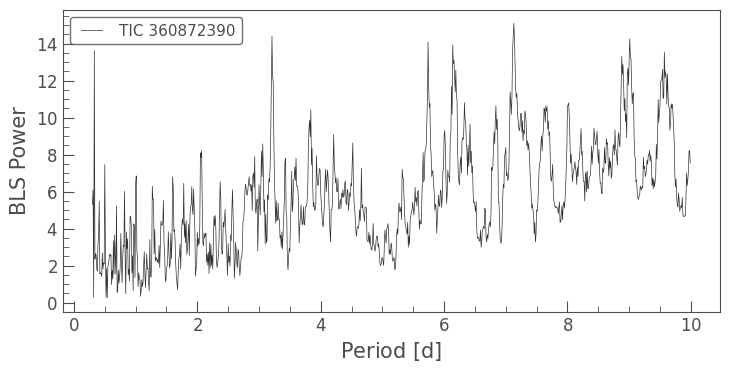

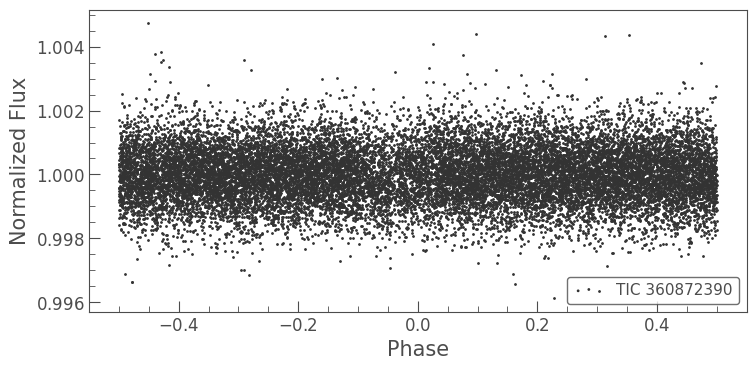

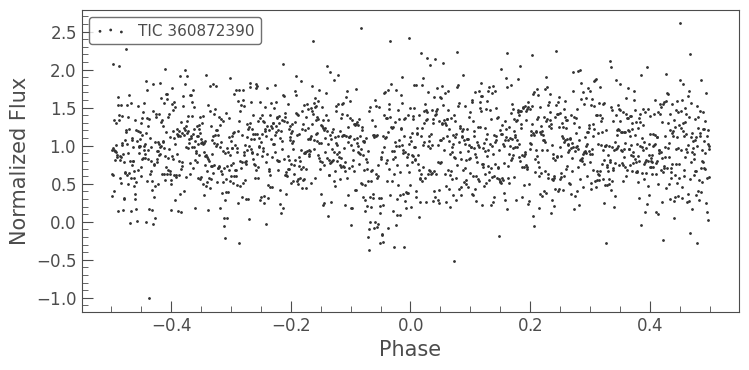

In [46]:
pg = lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.01))
lc_fold = lc.fold(period=pg.period_at_max_power)
lc_global = lc_fold.bin(bins=1703, method='median') - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1

lc.scatter()
pg.plot();
print(lc.label, ": Folding on period ",lc_fold.period)
lc_fold.scatter()
lc_global.scatter()